In [15]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,cross_validate
from sklearn.metrics import roc_curve

# Mengimport Dataset

In [3]:
data = pd.read_csv("C://Users//Asus//OneDrive//Documents//UPN//Perkuliahan//Semester 3//Analisis Data Eksploratif//Tugas Kelompok//Korelasi//alzheimers_disease.csv")
data.head()

,Age,BMI,PhysicalActivity,SleepQuality,CholesterolTotal,MMSE,FunctionalAssessment,ADL,Diagnosis
0,73,22.927749,6.327112,9.025679,242.366840,21.463532,6.518877,1.725883,0
1,89,26.827681,7.619885,7.151293,231.162595,20.613267,7.118696,2.592424,0
2,73,17.795882,7.844988,9.673574,284.181858,7.356249,5.895077,7.119548,0
3,74,33.800817,8.428001,8.392554,159.582240,13.991127,8.965106,6.481226,0
4,89,20.716974,6.310461,5.597238,237.602184,13.517609,6.045039,0.014691,0


# Preprocessing Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2149 non-null   int64  
 1   BMI                   2149 non-null   float64
 2   PhysicalActivity      2149 non-null   float64
 3   SleepQuality          2149 non-null   float64
 4   CholesterolTotal      2149 non-null   float64
 5   MMSE                  2149 non-null   float64
 6   FunctionalAssessment  2149 non-null   float64
 7   ADL                   2149 non-null   float64
 8   Diagnosis             2149 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 151.2 KB


In [5]:
data.isna().sum()

Age                     0
BMI                     0
PhysicalActivity        0
SleepQuality            0
CholesterolTotal        0
MMSE                    0
FunctionalAssessment    0
ADL                     0
Diagnosis               0
dtype: int64

In [6]:
data.duplicated().sum()

0

## Mendeteksi Outlier

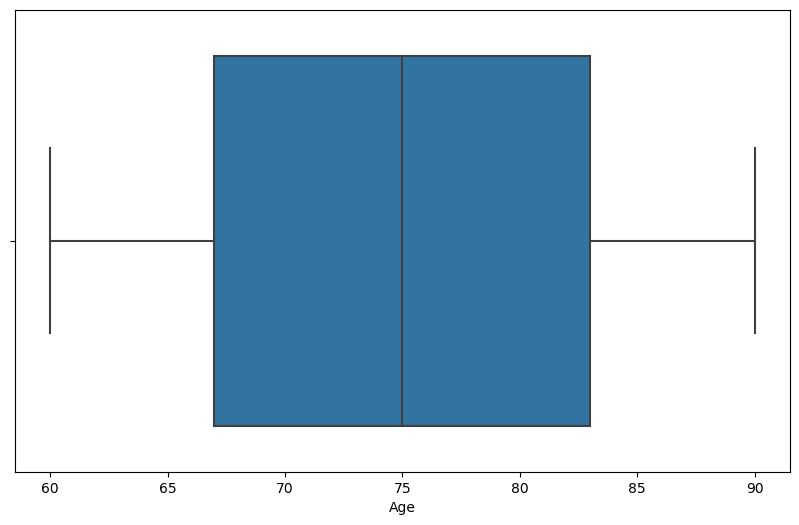

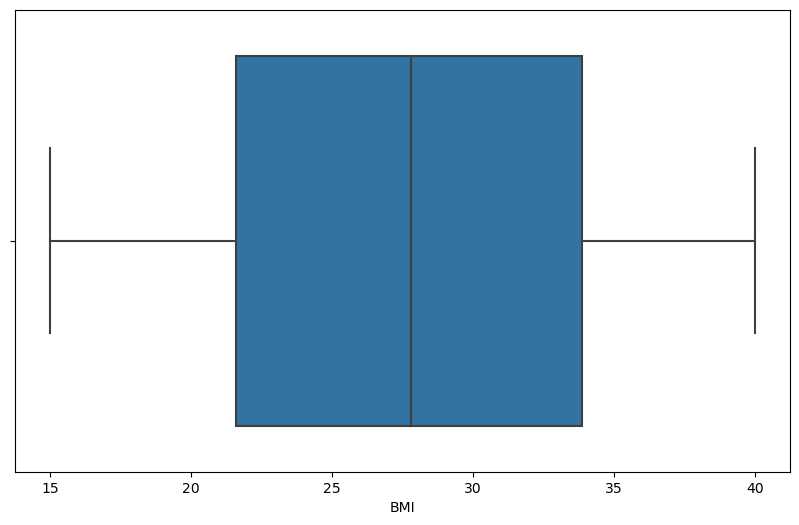

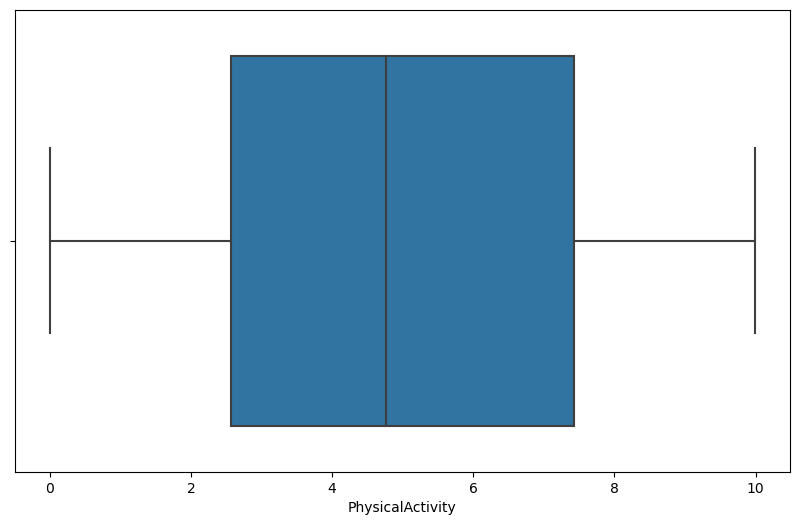

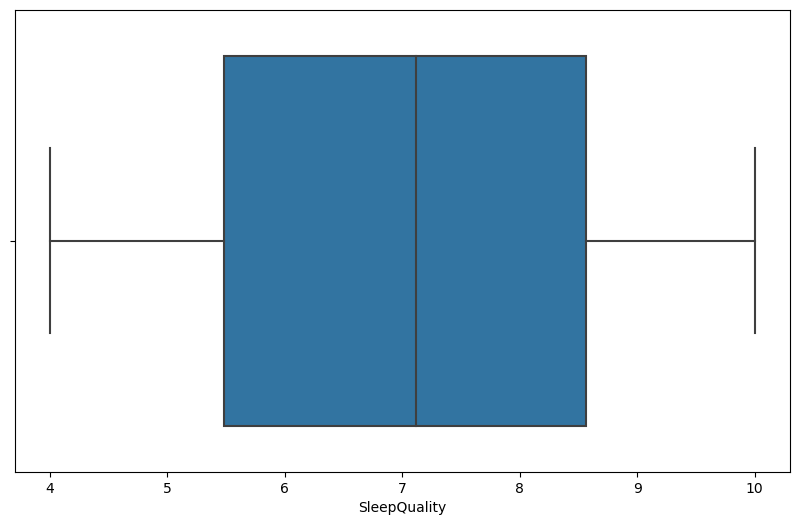

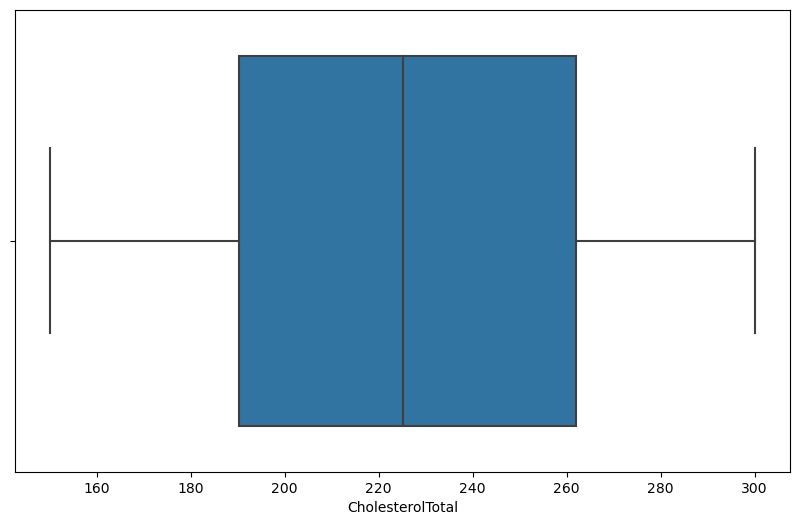

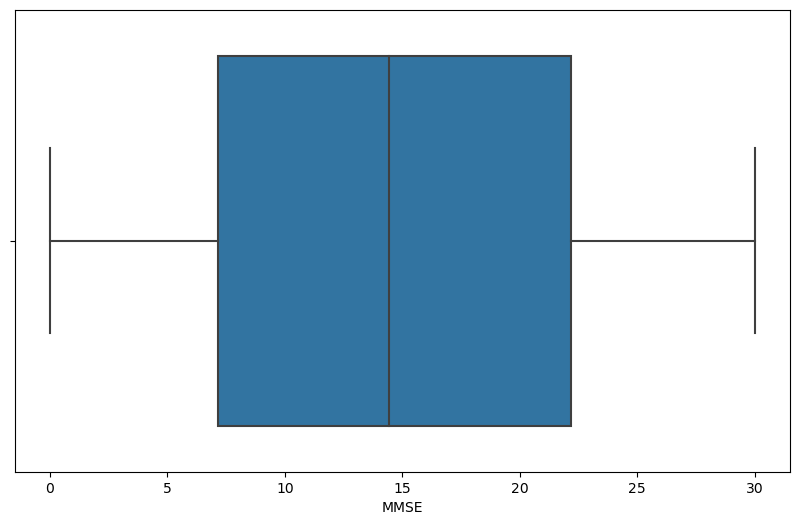

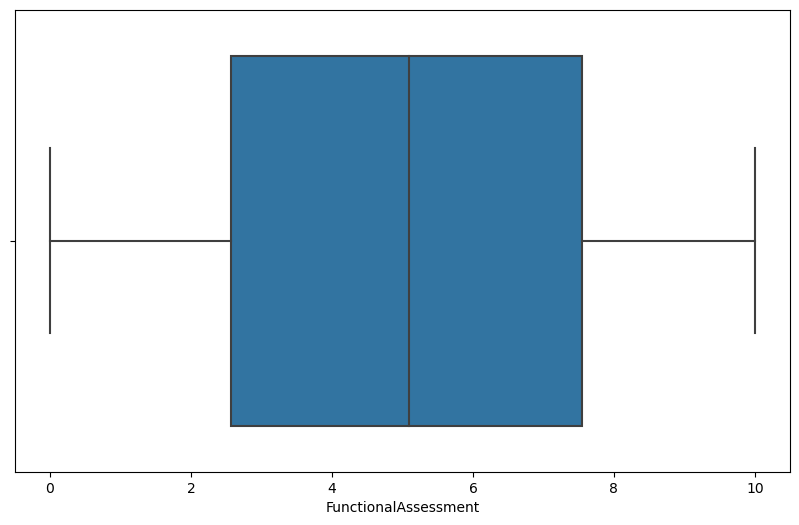

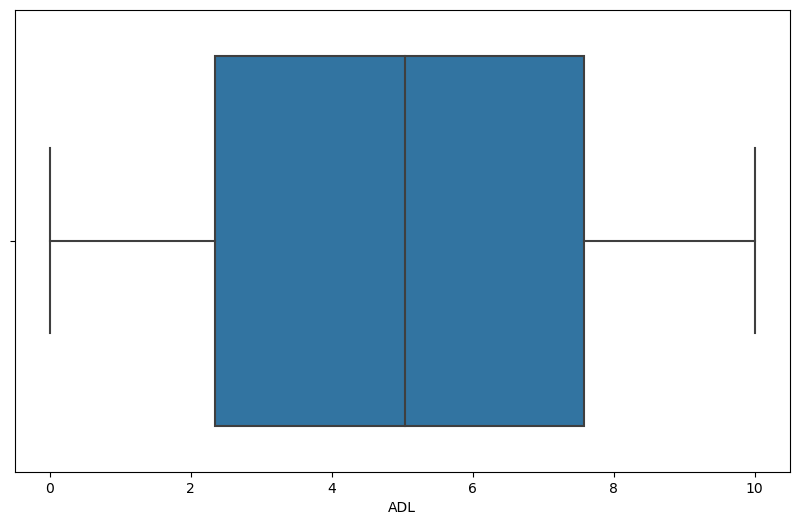

In [7]:
for col in ['Age', 'BMI', 'PhysicalActivity', 'SleepQuality', 'CholesterolTotal', 'MMSE','FunctionalAssessment', 'ADL']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, data=data)
    plt.xlabel(col)
    plt.show()

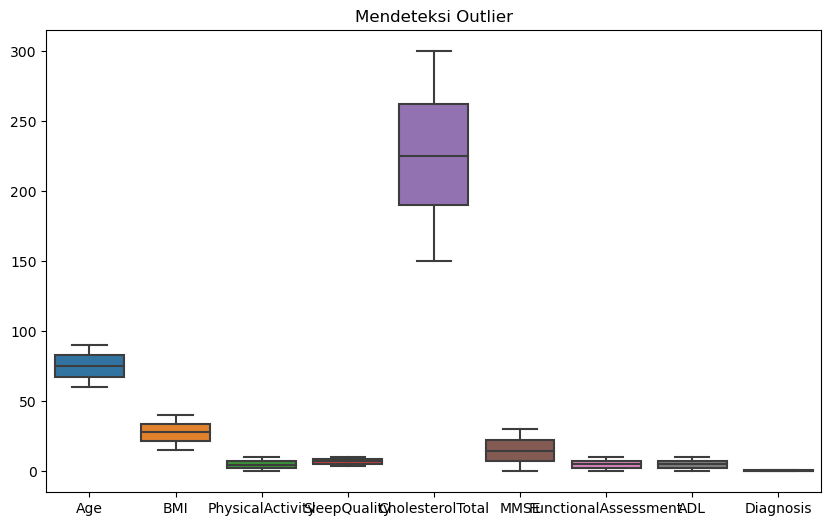

In [8]:
# Buat box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title("Mendeteksi Outlier")
plt.show()

## Analisis Korelasi

<Axes: >

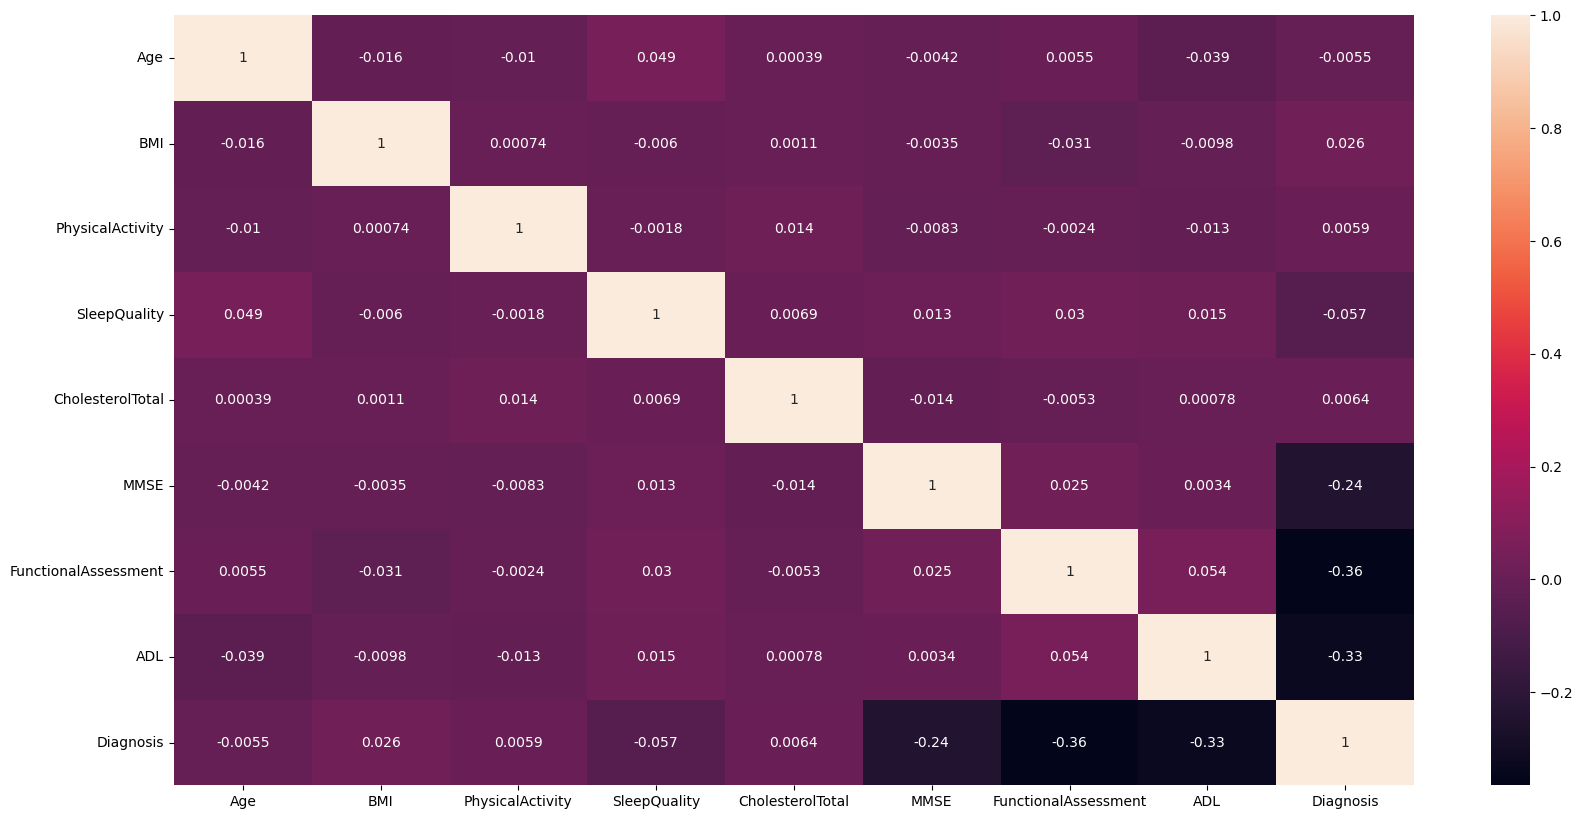

In [9]:
#plotting heatmap for overall data set
corr= data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr,annot=True)

# Data Preparation

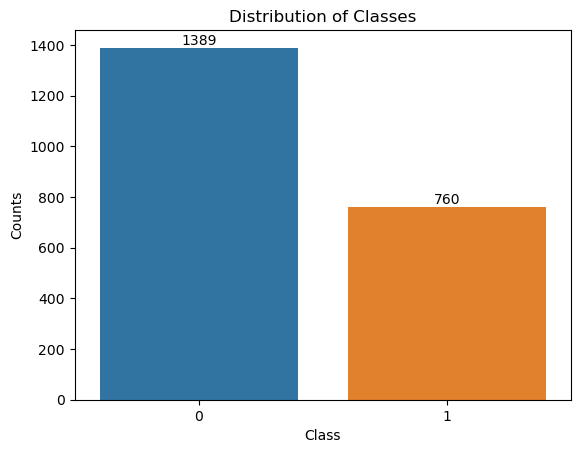

In [10]:
ax=sns.countplot(data,x="Diagnosis")
ax.bar_label(ax.containers[0])
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Counts")
plt.show()

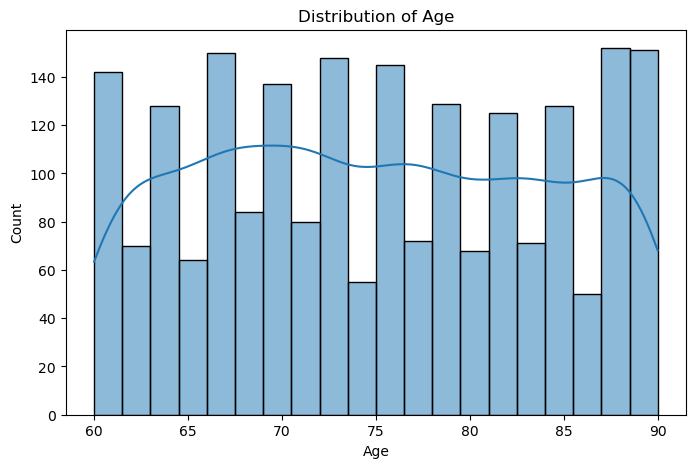

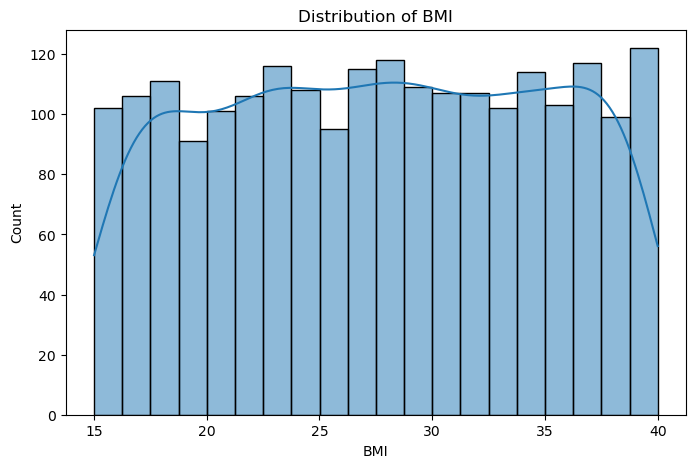

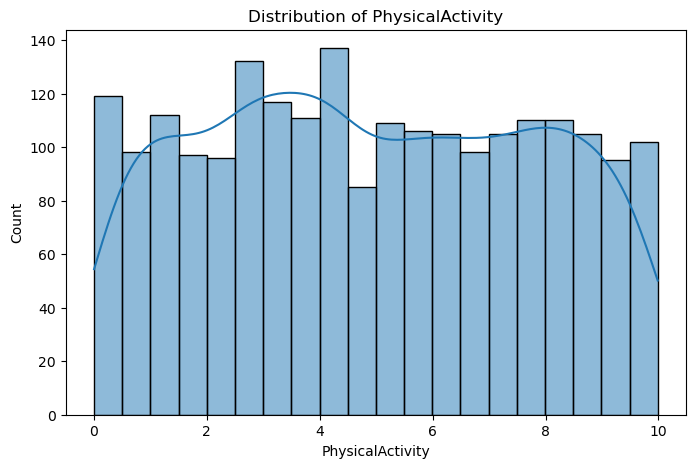

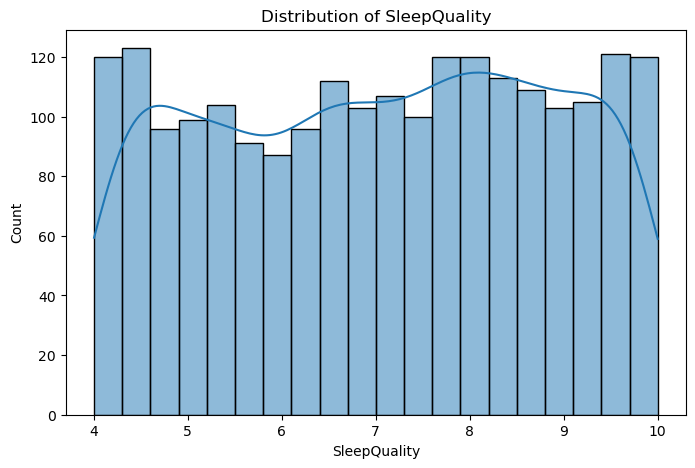

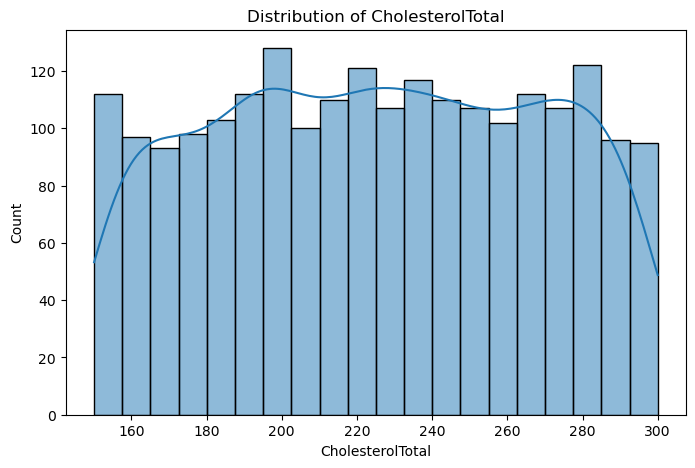

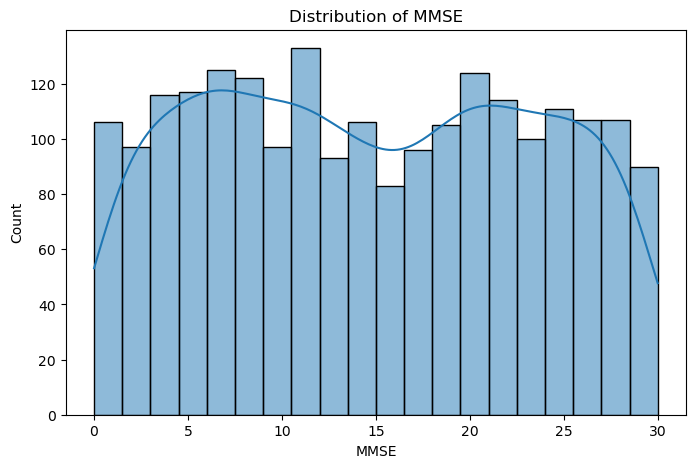

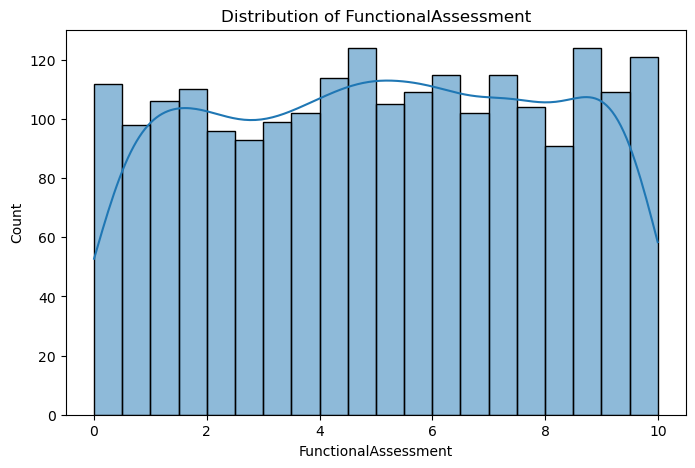

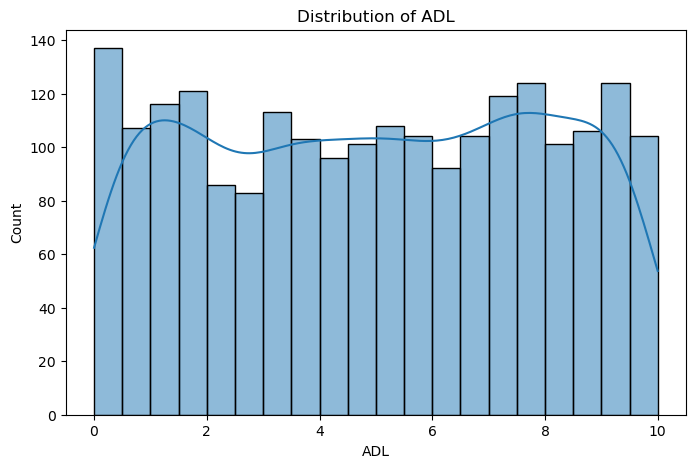

In [11]:
# Plot histogram for each numerical column
numerical_columns = ['Age', 'BMI', 'PhysicalActivity', 'SleepQuality', 'CholesterolTotal', 'MMSE','FunctionalAssessment', 'ADL']
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

# Model Creation And Training

In [12]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Pisahkan data menjadi data latih dan uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model regresi logistik

In [13]:
# Buat model Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## Model Evaluation (Logistic Regression)

Accuracy Score: 0.7627906976744186
Precision Score:0.704
Recall Score: 0.5751633986928104
F1 Score: 0.6330935251798561
Logistic Regression AUC: 0.7999103371793964
----------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       277
           1       0.70      0.58      0.63       153

    accuracy                           0.76       430
   macro avg       0.75      0.72      0.73       430
weighted avg       0.76      0.76      0.76       430

----------------------------------------------------------------------------
Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


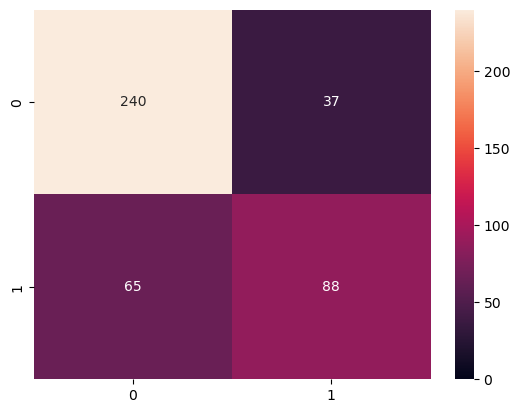

In [16]:
# Evaluasi Logistic Regression
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
print(f"Accuracy Score: {accuracy_score(y_test,y_pred_logreg)}")
print(f"Precision Score:{precision_score(y_test,y_pred_logreg)}")
print(f"Recall Score: {recall_score(y_test,y_pred_logreg)}")
print(f"F1 Score: {f1_score(y_test,y_pred_logreg)}")
print("Logistic Regression AUC:", roc_auc_score(y_test, y_prob_logreg))
print("----------------------------------------------------------------------------")
lr=confusion_matrix(y_test,y_pred_logreg)
print("Classification Report:")
print(classification_report(y_test,y_pred_logreg))
print("----------------------------------------------------------------------------")
print("Confusion Matrix:")
print(sns.heatmap(lr,vmin=0,annot=True,fmt=".3g"))

## Cross Validation (Logistic Regression)

In [17]:
scores=cross_validate(logreg,data,y,scoring=["accuracy","precision","recall","f1"],return_train_score=True)
scores=pd.DataFrame(scores,columns=scores.keys())
scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.242249,0.020207,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.108966,0.015205,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.114796,0.022666,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.136735,0.010159,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.119625,0.020227,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Model Pohon Keputusan

In [18]:
# Buat model Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Model Evaluation (Decision Tree)

Accuracy Score: 0.7534883720930232
Precision Score:0.6598639455782312
Recall Score: 0.6339869281045751
F1 Score: 0.6466666666666666
Decision Tree AUC: 0.7267407564710602
----------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       277
           1       0.66      0.63      0.65       153

    accuracy                           0.75       430
   macro avg       0.73      0.73      0.73       430
weighted avg       0.75      0.75      0.75       430

----------------------------------------------------------------------------
Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


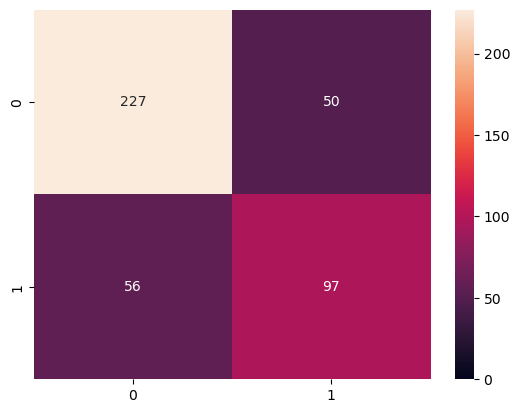

In [19]:
# Evaluasi Decision Tree
y_pred_dtree = dtree.predict(X_test)
y_prob_dtree = dtree.predict_proba(X_test)[:, 1]
print(f"Accuracy Score: {accuracy_score(y_test,y_pred_dtree)}")
print(f"Precision Score:{precision_score(y_test,y_pred_dtree)}")
print(f"Recall Score: {recall_score(y_test,y_pred_dtree)}")
print(f"F1 Score: {f1_score(y_test,y_pred_dtree)}")
print("Decision Tree AUC:", roc_auc_score(y_test, y_prob_dtree))
print("----------------------------------------------------------------------------")
lr=confusion_matrix(y_test,y_pred_dtree)
print("Classification Report:")
print(classification_report(y_test,y_pred_dtree))
print("----------------------------------------------------------------------------")
print("Confusion Matrix:")
print(sns.heatmap(lr,vmin=0,annot=True,fmt=".3g"))

## Cross Validation (Decision Tree)

In [20]:
scores=cross_validate(dtree,data,y,scoring=["accuracy","precision","recall","f1"],return_train_score=True)
scores=pd.DataFrame(scores,columns=scores.keys())
scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.015603,0.020437,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.020308,0.036106,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.006540,0.015102,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.009585,0.015181,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.009655,0.015170,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Best Model Selection And Evaluation

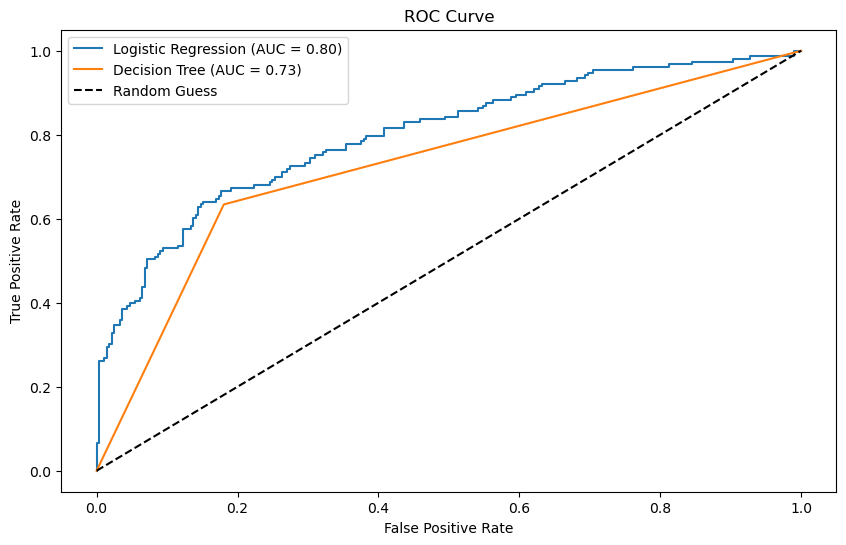

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Hitung ROC Curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, y_prob_dtree)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_logreg):.2f})")
plt.plot(fpr_dtree, tpr_dtree, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_prob_dtree):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()